<h1>Customer Service Requests Analysis.</h1>

Description

You've been asked to perform data analysis of service request (311) calls from New York City. You've also been asked to utilize data wrangling techniques to understand the pattern in the data and visualize the major types of complaints.

Perform the following steps:
1.
Understand the dataset    1. :
Identify the shape of the datas    2.et
Identify variables with null va 
2.
2. Perform basic data exploratory analy    1. is:

Utilize missing value tre    2. atment
Analyze the date column and remove the entries if it has an incorrect t        1. imeline
Draw a frequency plot for city-wise co        2. mplaints
Draw scatter and hexbin plots for complaint concentration across3. Find major types of complaints:    1. 
Plot a bar graph of count vs. complaint type    2. s
Find the top 10 types of complain    3. ts
Display the types of complaints in each city in a separate dat
4. Visualize the major types of complaints in each city

5. Check if the average response time across various types. lues (Optional)

Q1. Understand the dataset:
Identify the shape of the dataset
Identify variables with null values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df= pd.read_csv("311_Service_Requests_from_2010_to_Present.csv",parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],low_memory=False)
#print(df.head())
print(df.shape)

(364558, 53)


In [2]:
#Checking how much nullvalues % found in the dataset
nSer = round(df.isna().sum()/len(df)*100,2)
nSer

Unique Key                          0.00
Created Date                        0.00
Closed Date                         0.65
Agency                              0.00
Agency Name                         0.00
Complaint Type                      0.00
Descriptor                          1.78
Location Type                       0.04
Incident Zip                        0.82
Incident Address                   14.18
Street Name                        14.18
Cross Street 1                     15.69
Cross Street 2                     15.86
Intersection Street 1              85.98
Intersection Street 2              86.14
Address Type                        0.89
City                                0.82
Landmark                           99.90
Facility Type                       0.66
Status                              0.00
Due Date                            0.00
Resolution Description              0.00
Resolution Action Updated Date      0.66
Community Board                     0.00
Borough         

In [3]:
# List of those Columns where null % is higher than 20% 
nullCol=list(nSer[nSer>20].index) 
nullCol

['Intersection Street 1',
 'Intersection Street 2',
 'Landmark',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name']

In [4]:
#Droping the above null columns 
df.drop(nullCol,axis=1,inplace=True)
df.shape

(364558, 39)

Q2. Perform basic data exploratory analysis:
- (2.1) Utilize missing value treatment (2.2) Analyze the date column and remove the entries if it has an incorrect timeline 
- (2.2.1)Draw a frequency plot for city-wise complaints 
- (2.2.2)Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [5]:
# checking how much null values be there 
def CheckNull(df):
    nSer = round(df.isna().sum()/len(df)*100,2)
    nullCol=nSer[nSer>0] 
    return nullCol
#df[list(nullCol.index)].head(5)

In [6]:
#Checking null values in date columns
dateNull=df[['Created Date','Closed Date','Resolution Action Updated Date']].isnull().sum()
dateNull

Created Date                         0
Closed Date                       2381
Resolution Action Updated Date    2402
dtype: int64

In [7]:
#Checking that Resolution Action Updated Date is Greater than Creation Date
incorrect_ResDateEntry = df[df['Resolution Action Updated Date'] < df['Created Date']]
incorrect_ResDateEntry

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
61086,31880851,2015-11-01 01:57:24,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11378.0,53-73 65 PLACE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.729259,-73.900223,"(40.72925894967772, -73.90022336472336)"
61095,31886638,2015-11-01 01:54:37,NaT,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11233.0,847 HERKIMER STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.678310,-73.925082,"(40.678310248732046, -73.9250822918449)"
61098,31884397,2015-11-01 01:53:10,NaT,NYPD,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,10024.0,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.789051,-73.970301,"(40.78905142646646, -73.970300867221)"
61111,31884894,2015-11-01 01:46:36,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10032.0,643 WEST 172 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.844217,-73.939656,"(40.84421656446944, -73.93965613439441)"
61119,31885698,2015-11-01 01:43:18,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10032.0,WEST 172ND STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.843961,-73.939031,"(40.843960977988715, -73.9390310996927)"


In [8]:
#Drop the incorrect Entry (Where as Resolution date is cannot be greater than Creation Date )
datas=df.drop(incorrect_ResDateEntry.index,axis=0,inplace=True)
df.shape

(364553, 39)

In [9]:
ndf = df.dropna(subset=["Closed Date","Resolution Action Updated Date"], axis=0,inplace=True) #Removing null entries from data set
dateNull=df[['Created Date','Closed Date','Resolution Action Updated Date']].isnull().sum() #ReChecking null values in date columns
print(dateNull) 
print(CheckNull(df))
df.shape # New DataFrame         

Created Date                      0
Closed Date                       0
Resolution Action Updated Date    0
dtype: int64
Descriptor                     1.79
Location Type                  0.03
Incident Zip                   0.19
Incident Address              14.27
Street Name                   14.27
Cross Street 1                15.28
Cross Street 2                15.31
Address Type                   0.26
City                           0.19
X Coordinate (State Plane)     0.47
Y Coordinate (State Plane)     0.47
Latitude                       0.47
Longitude                      0.47
Location                       0.47
dtype: float64


(362138, 39)

In [10]:
# Removing Un-needed & Null Columns 
df.drop(['Incident Address','Incident Zip','Street Name','Address Type','Cross Street 2','Cross Street 1'],axis=1,inplace=True)
df.shape

(362138, 33)

In [11]:
CheckNull(df)# Rechecking the Data 
# df.groupby(['Complaint Type']).agg({'Descriptor': lambda y : y.mode()}) # Try to fill the na value with Complaint type 

Descriptor                    1.79
Location Type                 0.03
City                          0.19
X Coordinate (State Plane)    0.47
Y Coordinate (State Plane)    0.47
Latitude                      0.47
Longitude                     0.47
Location                      0.47
dtype: float64

In [12]:
#filling "Descriptor" column with some Data
df['Descriptor'].fillna('BlankData',inplace=True)
print(CheckNull(df)) #Rechecking the Data 
df.dropna(subset=['City'],axis=0,inplace=True) # Removing Null Values from City Column

Location Type                 0.03
City                          0.19
X Coordinate (State Plane)    0.47
Y Coordinate (State Plane)    0.47
Latitude                      0.47
Longitude                     0.47
Location                      0.47
dtype: float64


In [13]:
loca_Var=['X Coordinate (State Plane)','Y Coordinate (State Plane)','Latitude','Longitude']

In [14]:
grp_City = df.groupby('City').mean(numeric_only=True)[loca_Var]
grp_City

,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
City,,,,
ARVERNE,1.041269e+06,155051.771318,40.592074,-73.794696
ASTORIA,1.006436e+06,218671.264234,40.766850,-73.919907
Astoria,1.006736e+06,218538.375691,40.766485,-73.918823
BAYSIDE,1.046241e+06,218949.182171,40.767424,-73.776205
BELLEROSE,1.061209e+06,206584.782341,40.733369,-73.722310
BREEZY POINT,1.013154e+06,144957.096774,40.564502,-73.895969
BRONX,1.017858e+06,249094.929738,40.850315,-73.878518
BROOKLYN,9.962007e+05,177931.354540,40.655043,-73.956923
CAMBRIA HEIGHTS,1.056868e+06,192470.053485,40.694665,-73.738126


In [15]:
#filling data with mode 
for i in ['Location Type']:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [16]:
loca = df[df['Location'].isna()]#Checking how many data is null in Location Column
loca

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,City,Facility Type,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
434,32306605,2015-12-31 13:51:35,2015-12-31 14:32:56,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,WOODSIDE,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
1328,32301444,2015-12-30 13:40:54,2015-12-30 15:32:10,NYPD,New York City Police Department,Traffic,Congestion/Gridlock,Street/Sidewalk,NEW YORK,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
1910,32291243,2015-12-29 20:35:44,2015-12-31 10:41:12,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,BRONX,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
2044,32297486,2015-12-29 17:01:26,2015-12-29 20:30:39,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,NEW YORK,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
2372,32292630,2015-12-29 09:36:00,2015-12-29 13:19:06,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,BRONX,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360898,29645586,2015-01-06 12:40:04,2015-01-06 21:41:11,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,NEW YORK,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
362116,29631430,2015-01-04 16:06:52,2015-01-05 07:34:21,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NEW YORK,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
362297,29630704,2015-01-04 09:55:05,2015-01-04 11:22:24,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,BRONX,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
363157,29621060,2015-01-03 00:51:01,2015-01-03 03:03:18,NYPD,New York City Police Department,Animal Abuse,No Shelter,Residential Building,BRONX,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN


In [17]:
# Fetching Where location(Latitude,Longitude) is missing w.r.t perticular city 
unq_City = df[df['Location'].isna() == True]['City'].unique() 
unq_City

array(['WOODSIDE', 'NEW YORK', 'BRONX', 'FOREST HILLS', 'STATEN ISLAND',
       'BROOKLYN', 'FLUSHING', 'OAKLAND GARDENS', 'FRESH MEADOWS',
       'RIDGEWOOD', 'ASTORIA', 'JAMAICA', 'LONG ISLAND CITY',
       'SOUTH RICHMOND HILL', 'ROCKAWAY PARK', 'ROSEDALE', 'CORONA',
       'REGO PARK', 'BAYSIDE', 'HOWARD BEACH', 'FAR ROCKAWAY', 'QUEENS',
       'MASPETH', 'ARVERNE', 'MIDDLE VILLAGE', 'WHITESTONE'], dtype=object)

In [18]:
# filling value for latitude, longitude and etc column
for i in unq_City:
    df.loc[(df['Latitude'].isna() == True) & (df['City'] == i),loca_Var]= tuple(grp_City.loc[i].values)

In [19]:
df['Location']= tuple(df[['Latitude','Longitude']].values)

In [20]:
CheckNull(df)# Rechecking for nullvalues, Hence No Null Vales are left

Series([], dtype: float64)

In [21]:
df['Unique Key'].duplicated().sum() #check ther is no duplicates

0

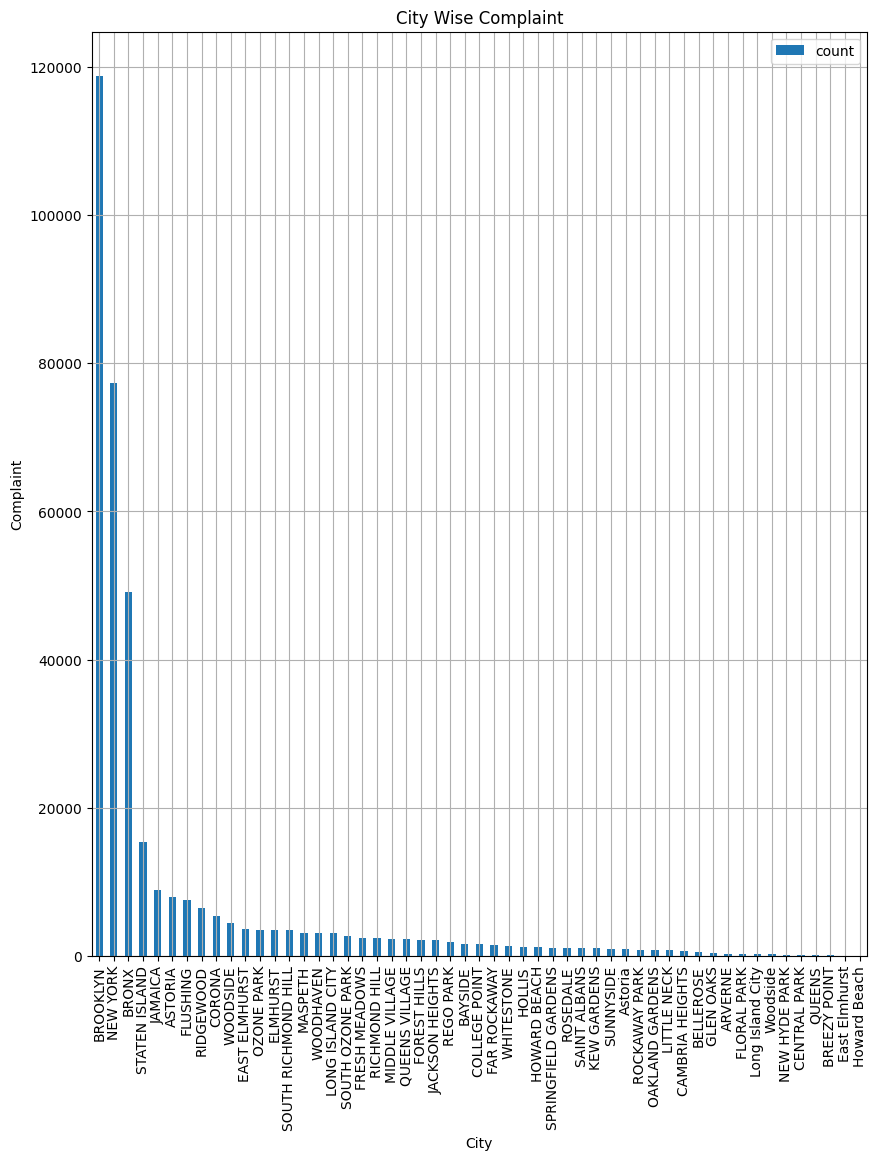

In [22]:
# Frequency plot for city-wise complaints
df['City'].value_counts().to_frame().plot(kind='bar',ylabel='Complaint',title='City Wise Complaint',grid=True,figsize=(10,12))
plt.savefig('City Wise Complaint Frequency Plot')

So from the above plot we can conclude that Brooklyn City records highest number of complaints as Compare to Other cities

In [23]:
df_Brook= df[df['City']=='BROOKLYN']
df_Brook # Brooklyn dataset

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,City,Facility Type,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,BROOKLYN,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.660823,-73.992568,"[40.66082272389114, -73.99256786342693]"
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,BROOKLYN,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.623793,-73.999539,"[40.62379306580653, -73.99953890121567]"
13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:47,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,BROOKLYN,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.687511,-73.874505,"[40.68751060232221, -73.87450451131276]"
17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:10,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,BROOKLYN,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.679154,-73.983430,"[40.679154133157326, -73.98342992763081]"
18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:28,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,BROOKLYN,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.616550,-73.930202,"[40.61655032892211, -73.93020153359745]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364539,29608505,2015-01-01 00:23:55,2015-01-01 02:58:38,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,BROOKLYN,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.691248,-73.984375,"[40.69124772858873, -73.98437529459297]"
364541,29612697,2015-01-01 00:19:22,2015-01-01 02:41:10,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,BROOKLYN,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.713613,-73.956966,"[40.71361332917013, -73.95696623841229]"
364544,29613295,2015-01-01 00:17:48,2015-01-01 03:24:48,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,BROOKLYN,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.680352,-73.974766,"[40.68035202521423, -73.97476587888686]"
364545,29613456,2015-01-01 00:17:47,2015-01-01 00:51:13,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,BROOKLYN,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.692384,-73.904011,"[40.692383519190834, -73.90401080101479]"


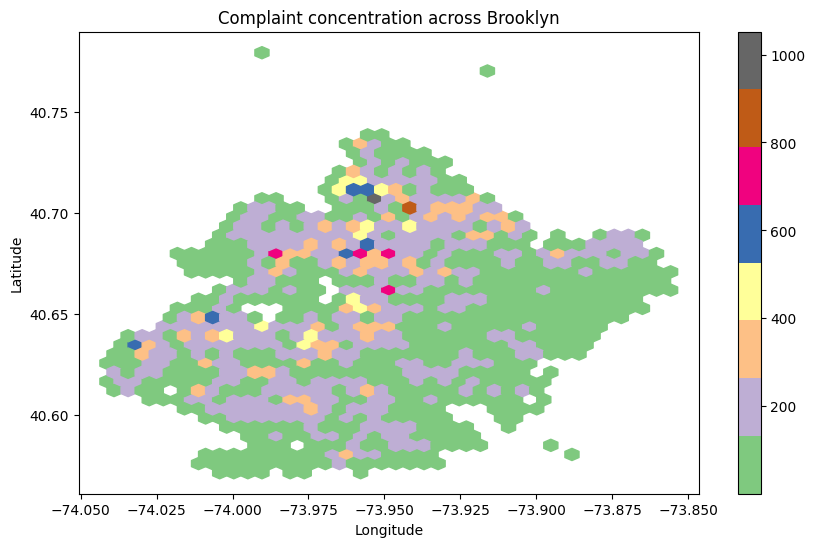

In [24]:
#Complaint concentration across Brooklyn    
#Hexbin Plot
df_Brook.plot(kind='hexbin', x='Longitude', y='Latitude',colormap = 'Accent',title ='Complaint concentration across Brooklyn', mincnt=1,figsize=(10,6),gridsize=40)
plt.savefig("Complaint concentration across Brooklyn")

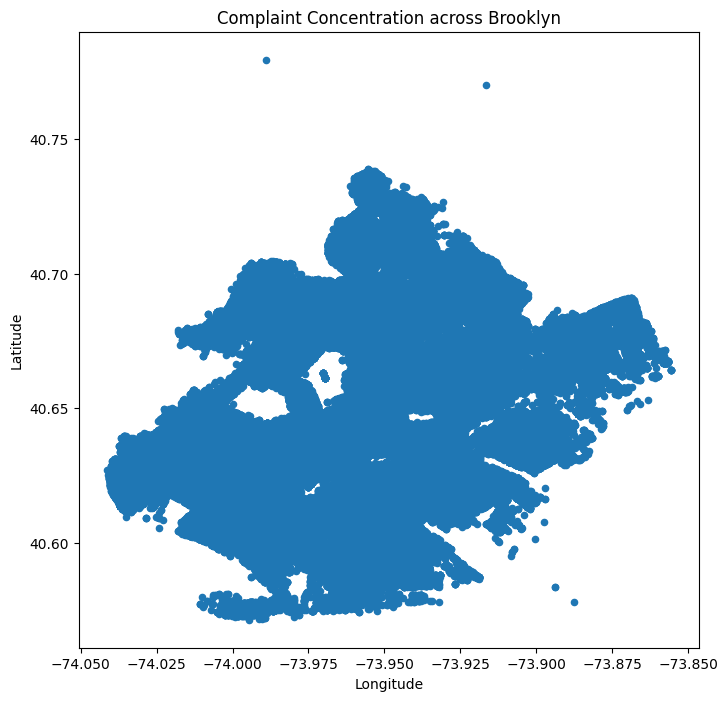

In [25]:
## Complaint concentration across Brooklyn    
#Scatter Plot
df_Brook.plot(kind='scatter',x='Longitude', y='Latitude', figsize=(8,8),title = 'Complaint Concentration across Brooklyn')
plt.savefig("Complaint Concentration across Brooklyn Scatter Plot")

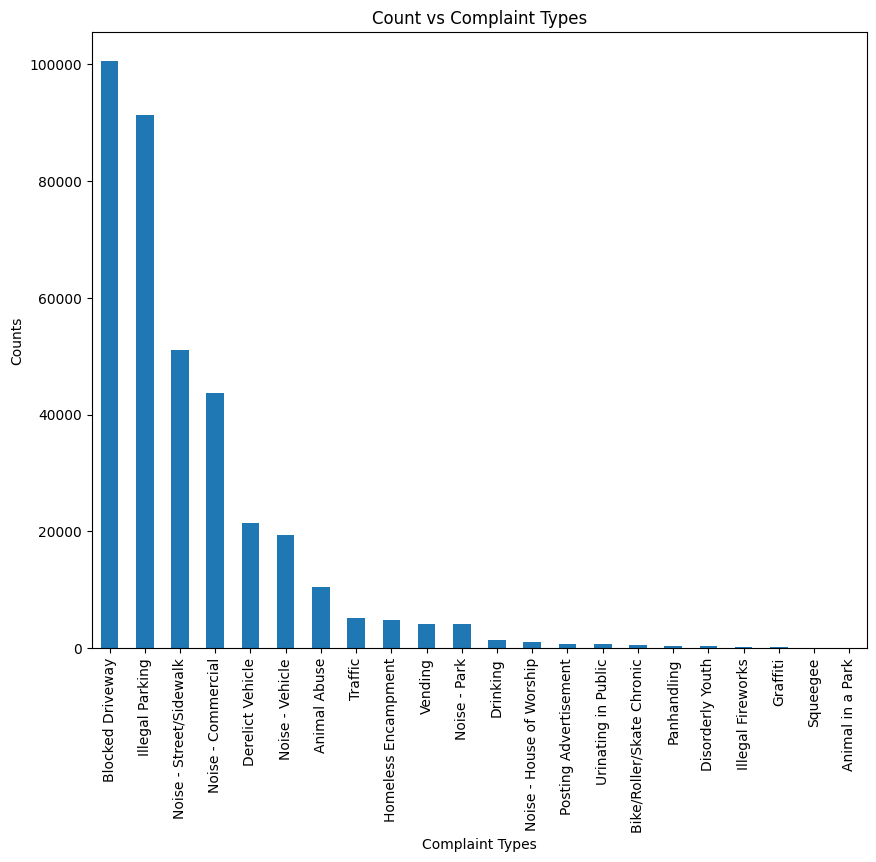

In [26]:
#Plot a bar graph of count vs. complaint types
df['Complaint Type'].value_counts().plot(kind='bar',title='Count vs Complaint Types', xlabel='Complaint Types', ylabel='Counts',figsize=(10,8))
plt.savefig("count vs complaint types")

Blocked Driveway and Illegal Parking are the major Complaints 

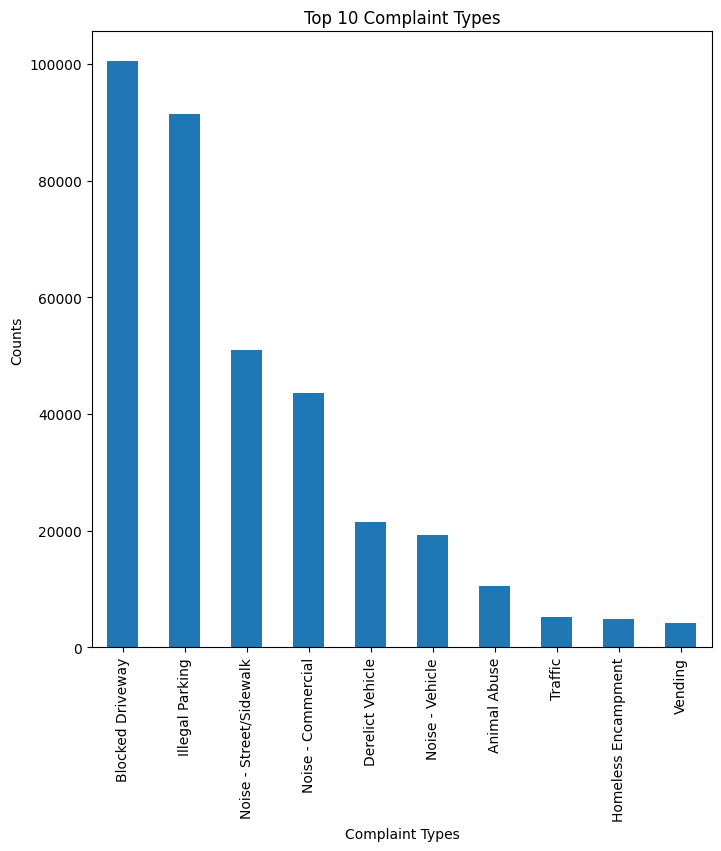

In [27]:
#top 10 types of complaints
df['Complaint Type'].value_counts().head(10).plot(kind='bar',title='Top 10 Complaint Types', xlabel='Complaint Types', ylabel='Counts',figsize=(8,8))
plt.savefig("Top 10 Complaint Types")

Q4. Visualize the major types of complaints in each city

In [28]:
comp_city = df.groupby(['City','Complaint Type']).size().unstack()
comp_city.head()

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,46.0,NaN,NaN,50.0,32.0,2.0,1.0,1.0,4.0,NaN,...,14.0,2.0,29.0,10.0,1.0,NaN,NaN,1.0,1.0,1.0
ASTORIA,170.0,NaN,16.0,3436.0,426.0,5.0,43.0,4.0,32.0,4.0,...,21.0,64.0,409.0,236.0,2.0,3.0,NaN,60.0,10.0,57.0
Astoria,NaN,NaN,NaN,159.0,14.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAYSIDE,53.0,NaN,NaN,514.0,231.0,2.0,1.0,3.0,2.0,NaN,...,3.0,4.0,17.0,24.0,NaN,NaN,NaN,9.0,NaN,2.0
BELLEROSE,15.0,NaN,1.0,138.0,120.0,2.0,1.0,NaN,1.0,1.0,...,1.0,1.0,13.0,11.0,1.0,1.0,NaN,9.0,1.0,NaN


Q5. Check the average response time across various types of complaints.

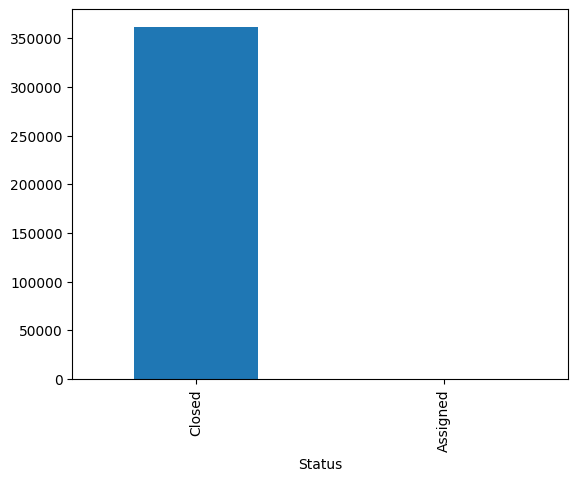

In [29]:
df['Status'].value_counts().plot(kind='bar')
plt.savefig("Ticket status")

All Tickects are Closed

In [30]:
df['Complaint_Closing_Time']= df["Closed Date"] - df["Created Date"]
#print(df['Complaint_Closing_Time'])
df['Request_Closing_Seconds']= df['Complaint_Closing_Time'].astype('timedelta64[s]').astype('int64')
df[['Complaint_Closing_Time','Request_Closing_Seconds']].head(5)

,Complaint_Closing_Time,Request_Closing_Seconds
0,0 days 00:55:30,3330
1,0 days 01:27:13,5233
2,0 days 04:51:34,17494
3,0 days 07:45:27,27927
4,0 days 03:27:44,12464


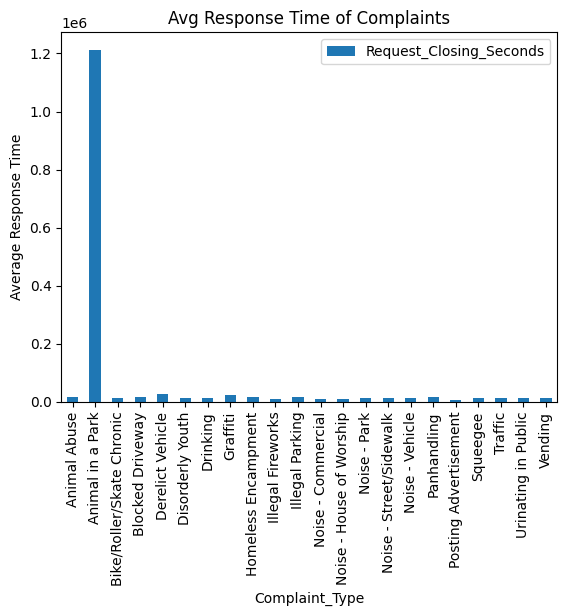

In [31]:
avg_complain_response_time = df.groupby(['Complaint Type'])[['Request_Closing_Seconds']].mean()
avg_complain_response_time
avg_complain_response_time.plot(kind='bar',title='Avg Response Time of Complaints', xlabel='Complaint_Type', ylabel='Average Response Time')
plt.savefig("Avg Response Time of Complaints.jpg")
plt.show()

'Animal in a Park' Compalint type takes longer than other Compalints to resolve

Q3(3) Display the types of complaints in each city in a separate dataset

In [32]:
new_City_dataset= comp_city[df['Complaint Type'].unique()]
top10CityData=new_City_dataset.head(10) # New Data set with top 10 City
top10CityData

Complaint Type,Noise - Street/Sidewalk,Blocked Driveway,Illegal Parking,Derelict Vehicle,Noise - Commercial,Noise - House of Worship,Posting Advertisement,Noise - Vehicle,Animal Abuse,Vending,...,Bike/Roller/Skate Chronic,Panhandling,Noise - Park,Homeless Encampment,Urinating in Public,Graffiti,Disorderly Youth,Illegal Fireworks,Squeegee,Animal in a Park
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,29.0,50.0,62.0,32.0,2.0,14.0,NaN,10.0,46.0,1.0,...,NaN,1.0,2.0,4.0,1.0,1.0,2.0,NaN,NaN,NaN
ASTORIA,409.0,3436.0,1340.0,426.0,1653.0,21.0,3.0,236.0,170.0,57.0,...,16.0,2.0,64.0,32.0,10.0,4.0,5.0,4.0,NaN,NaN
Astoria,145.0,159.0,277.0,14.0,310.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAYSIDE,17.0,514.0,638.0,231.0,47.0,3.0,NaN,24.0,53.0,2.0,...,NaN,NaN,4.0,2.0,NaN,3.0,2.0,NaN,NaN,NaN
BELLEROSE,13.0,138.0,132.0,120.0,38.0,1.0,1.0,11.0,15.0,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,2.0,1.0,NaN,NaN
BREEZY POINT,1.0,3.0,16.0,3.0,4.0,NaN,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BRONX,9144.0,17061.0,9889.0,2402.0,2944.0,90.0,17.0,3555.0,1971.0,433.0,...,22.0,20.0,548.0,275.0,54.0,15.0,66.0,24.0,NaN,NaN
BROOKLYN,13982.0,36444.0,33528.0,6257.0,13855.0,389.0,58.0,5965.0,3191.0,574.0,...,124.0,49.0,1574.0,947.0,155.0,60.0,79.0,61.0,NaN,NaN
CAMBRIA HEIGHTS,29.0,177.0,113.0,148.0,19.0,2.0,NaN,100.0,15.0,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,1.0,NaN,NaN


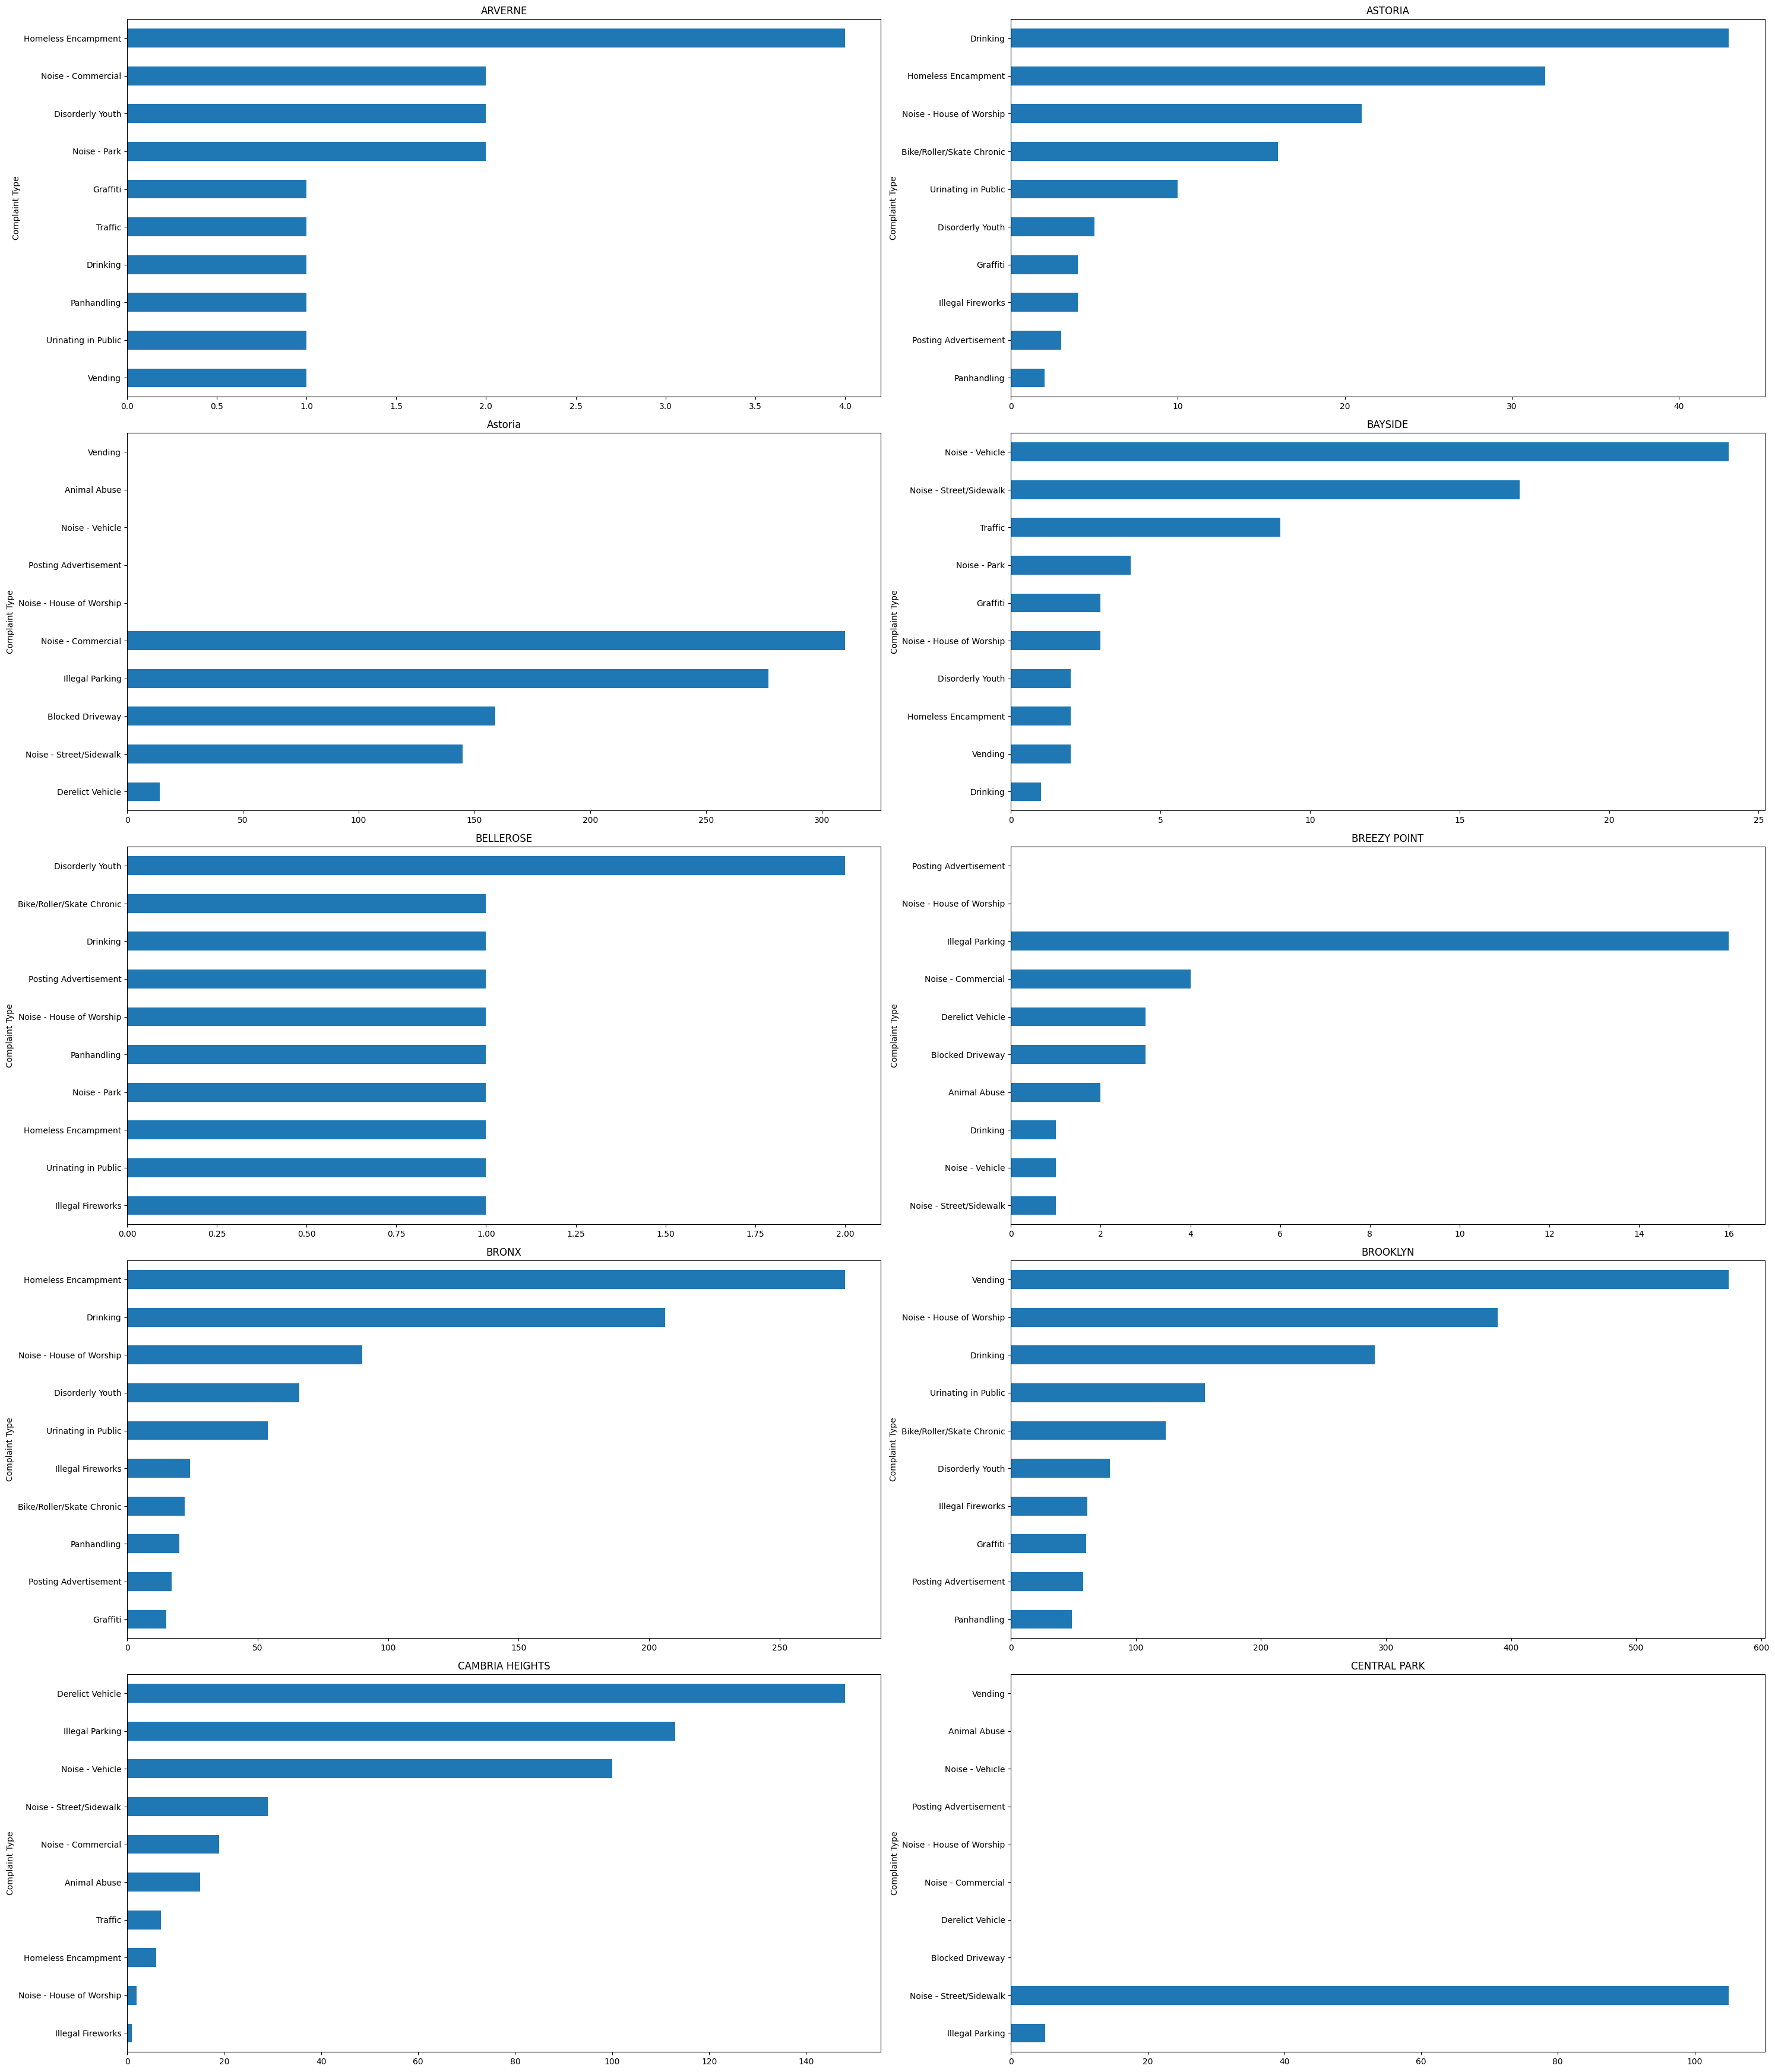

In [33]:
row_number = 5
col_number = 2
fig,axes = plt.subplots(row_number,col_number, figsize=(30,35))

for d, (label,col) in enumerate(top10CityData.iterrows()):
    ax = axes[int(d/col_number), d%col_number]
    col = col.sort_values()[:10]
    col.plot(kind='barh', ax = ax)
    ax.set_title(label)
plt.savefig("Different city-wise Complaints")    
plt.tight_layout()    